# M4 | Research Investigation Notebook

In this notebook, you will do a research investigation of your chosen dataset in teams. You will begin by formally selecting your research question (task 0), then processing your data (task 1), creating a predictive model (task 2), evaluating your model's results (task 3), and describing the contributions of each team member (task 4).

For grading, please make sure your notebook has all cells run and is stored in your team's [Github Classroom repository](https://classroom.github.com/a/CNxME27U). You will also need to write a short, 2 page report about your design decisions as a team, to be stored in your repository. The Milestone 4 submission will be the contents of your repository at the due date (April 28 at 23:59 CET).

## Brief overview of Calcularis
[Calcularis](https://school.alemira.com/de/calcularis/) by Alemira School is a mathematics learning program developed with neuroscientists and computer scientists from ETH Zurich. It promotes the development and interaction of the different areas of the brain that are responsible for processing numbers and quantities and solving mathematical tasks. Calcularis can be used from 1st grade to high school. Children with dyscalculia also benefit in the long term and overcome their arithmetic weakness.

The Calcularis dataset has three main tables:
* ***users***: meta information about users (i.e. total time spent learning with Calcularis, geographic location).
* ***events***: events done by the users in the platform (i.e. playing a game, selecting a new animal in the zoo simulation).
* ***subtasks***: sub-tasks with answer attempts solved by users, primarily in the context of game events.

These tables and useful metadata information are described in detail in the [Milestone 2 data exploration notebook](https://github.com/epfl-ml4ed/mlbd-2023/blob/main/project/milestone-02/m2_calcularis_sciper.ipynb).

We have provided access to the [full dataset](https://moodle.epfl.ch/mod/forum/discuss.php?d=88179) (~65k users) and a randomly selected subset (~1k users from M2). We have also provided access to a [test account to experiment with Calcularis](https://moodle.epfl.ch/mod/forum/discuss.php?d=88094). You should provide arguments and justifications for all of your design decisions throughout this investigation. You can use your M3 responses as the basis for this discussion.

In [65]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import random
import networkx as nx
from networkx.drawing.nx_agraph import read_dot
import matplotlib.pyplot as plt

In [66]:
# Import the tables of the data set as dataframes.

DATA_DIR = './data' # You many change the directory

# You can use the nrows=X argument in pd.read_csv to truncate your data
users = pd.read_csv('{}/calcularis_small_users.csv'.format(DATA_DIR), index_col=0)
events = pd.read_csv('{}/calcularis_small_events.csv'.format(DATA_DIR), index_col=0)
subtasks = pd.read_csv('{}/calcularis_small_subtasks.csv'.format(DATA_DIR), index_col=0)

## Task 0: Research Question

**Research question:**
*Your chosen research question goes here*

## Task 1: Data Preprocessing

In this section, you are asked to preprocess your data in a way that is relevant for the model. Please include 1-2 visualizations of features / data explorations that are related to your downstream prediction task.

In [67]:
# In subtasks dataset exist more event_id than in events dataset
print(len(events))
print(len(subtasks))
subtasks = subtasks[subtasks.event_id < len(events)]

# set the game names in subtasks dataset
subtasks = subtasks.copy()
subtasks['game_name'] = events.iloc[subtasks['event_id']]['game_name'].values

34094
55047


In [68]:
# read the DOT file and store it as a NetworkX graph
dot_file_path = 'data/04_calcularis_skill_map_dot_file.dot'
G = read_dot(dot_file_path)

In [69]:
dot_file_path = 'data/04_calcularis_skill_map_dot_file.dot'
G = read_dot(dot_file_path)

print(list(G.nodes()))
print(list(G.successors('0-10 Concrete\\n(Subitizing-10)')))

['Start A10', '0-10 Concrete\\n(Subitizing-10)', '0-10 Subitizing\\n(Subitizing-10)\\na0 Subitizing', '0-10 Verbal\\n(Number representation-10)', '0-10 Concrete -> Arabic\\n(Number representation-10)\\na1 Conversion', '0-10 Verbal -> Arabic\\n(Number representation-10)\\na2 Conversion', '0-10 Structured Sets\\n(Number representation-10)\\na3 ScaleSimpleConversion', '0-10 Arabic -> Structured\\n(Number representation-10)\\nA4 Conversion', '0-10 Arabic -> Concrete\\n(Number representation-10)\\na5 Conversion', '0-10 Arabic\\n(Number representation-10)', '0-10 Counting\\n(Number representation-10)', '0-10 Larger CV\\n(Ordinality-10)\\na6 SetComparison', '0-10 Larger CVA\\n(Ordinality-10)\\na7 SetComparison', '0-10 Larger A\\n(Ordinality-10)\\nA8 SetComparison', '0-10 Ordinal 1\\n(Ordinality-10)\\na9 Ordinality', '0-10 Relative\\n(Ordinality-10)\\na10 Ordinality', '0-10 Ordinal 2\\n(Ordinality-10)\\na11 Ordering', '0-10 Ordinal 3\\n(Ordinality-10)\\na12 SecretNumber', '0-10 Arabic -> Numbe

In [98]:
import matplotlib
matplotlib.use('Agg')

def drawgraph(graph, density=False):
  ## the default for the density is False. If density = True, it will return the density of the graph
  edges = graph.edges()
  ## k will affect the optimal distance between nodes.
  ## more types of layouts can be found at https://networkx.org/documentation/stable/reference/drawing.html
  pos=nx.spring_layout(graph,k=0.05,seed=42)
  fig, ax = plt.subplots(figsize=(20, 60))
  nx.draw_networkx(graph,
                   pos,
                   with_labels=True,
                   node_size=400,
                   node_color="mistyrose",
                   edgelist=edges, 
                   edge_cmap=plt.cm.Blues_r,
                   style="solid",
                   width=1,
                   ax = ax)
  plt.subplots_adjust(left=2, bottom=3.2, right=6, top=6)

  if density:
    print("----------------------------------------")
    print("Density:",nx.classes.function.density(graph))
    print("----------------------------------------")

  #plt.show()
  plt.savefig('graph.jpg', dpi = 300, bbox_inches='tight')
  plt.close()
  #return plt.show()

drawgraph(G, True)

----------------------------------------
Density: 0.00699965433805738
----------------------------------------


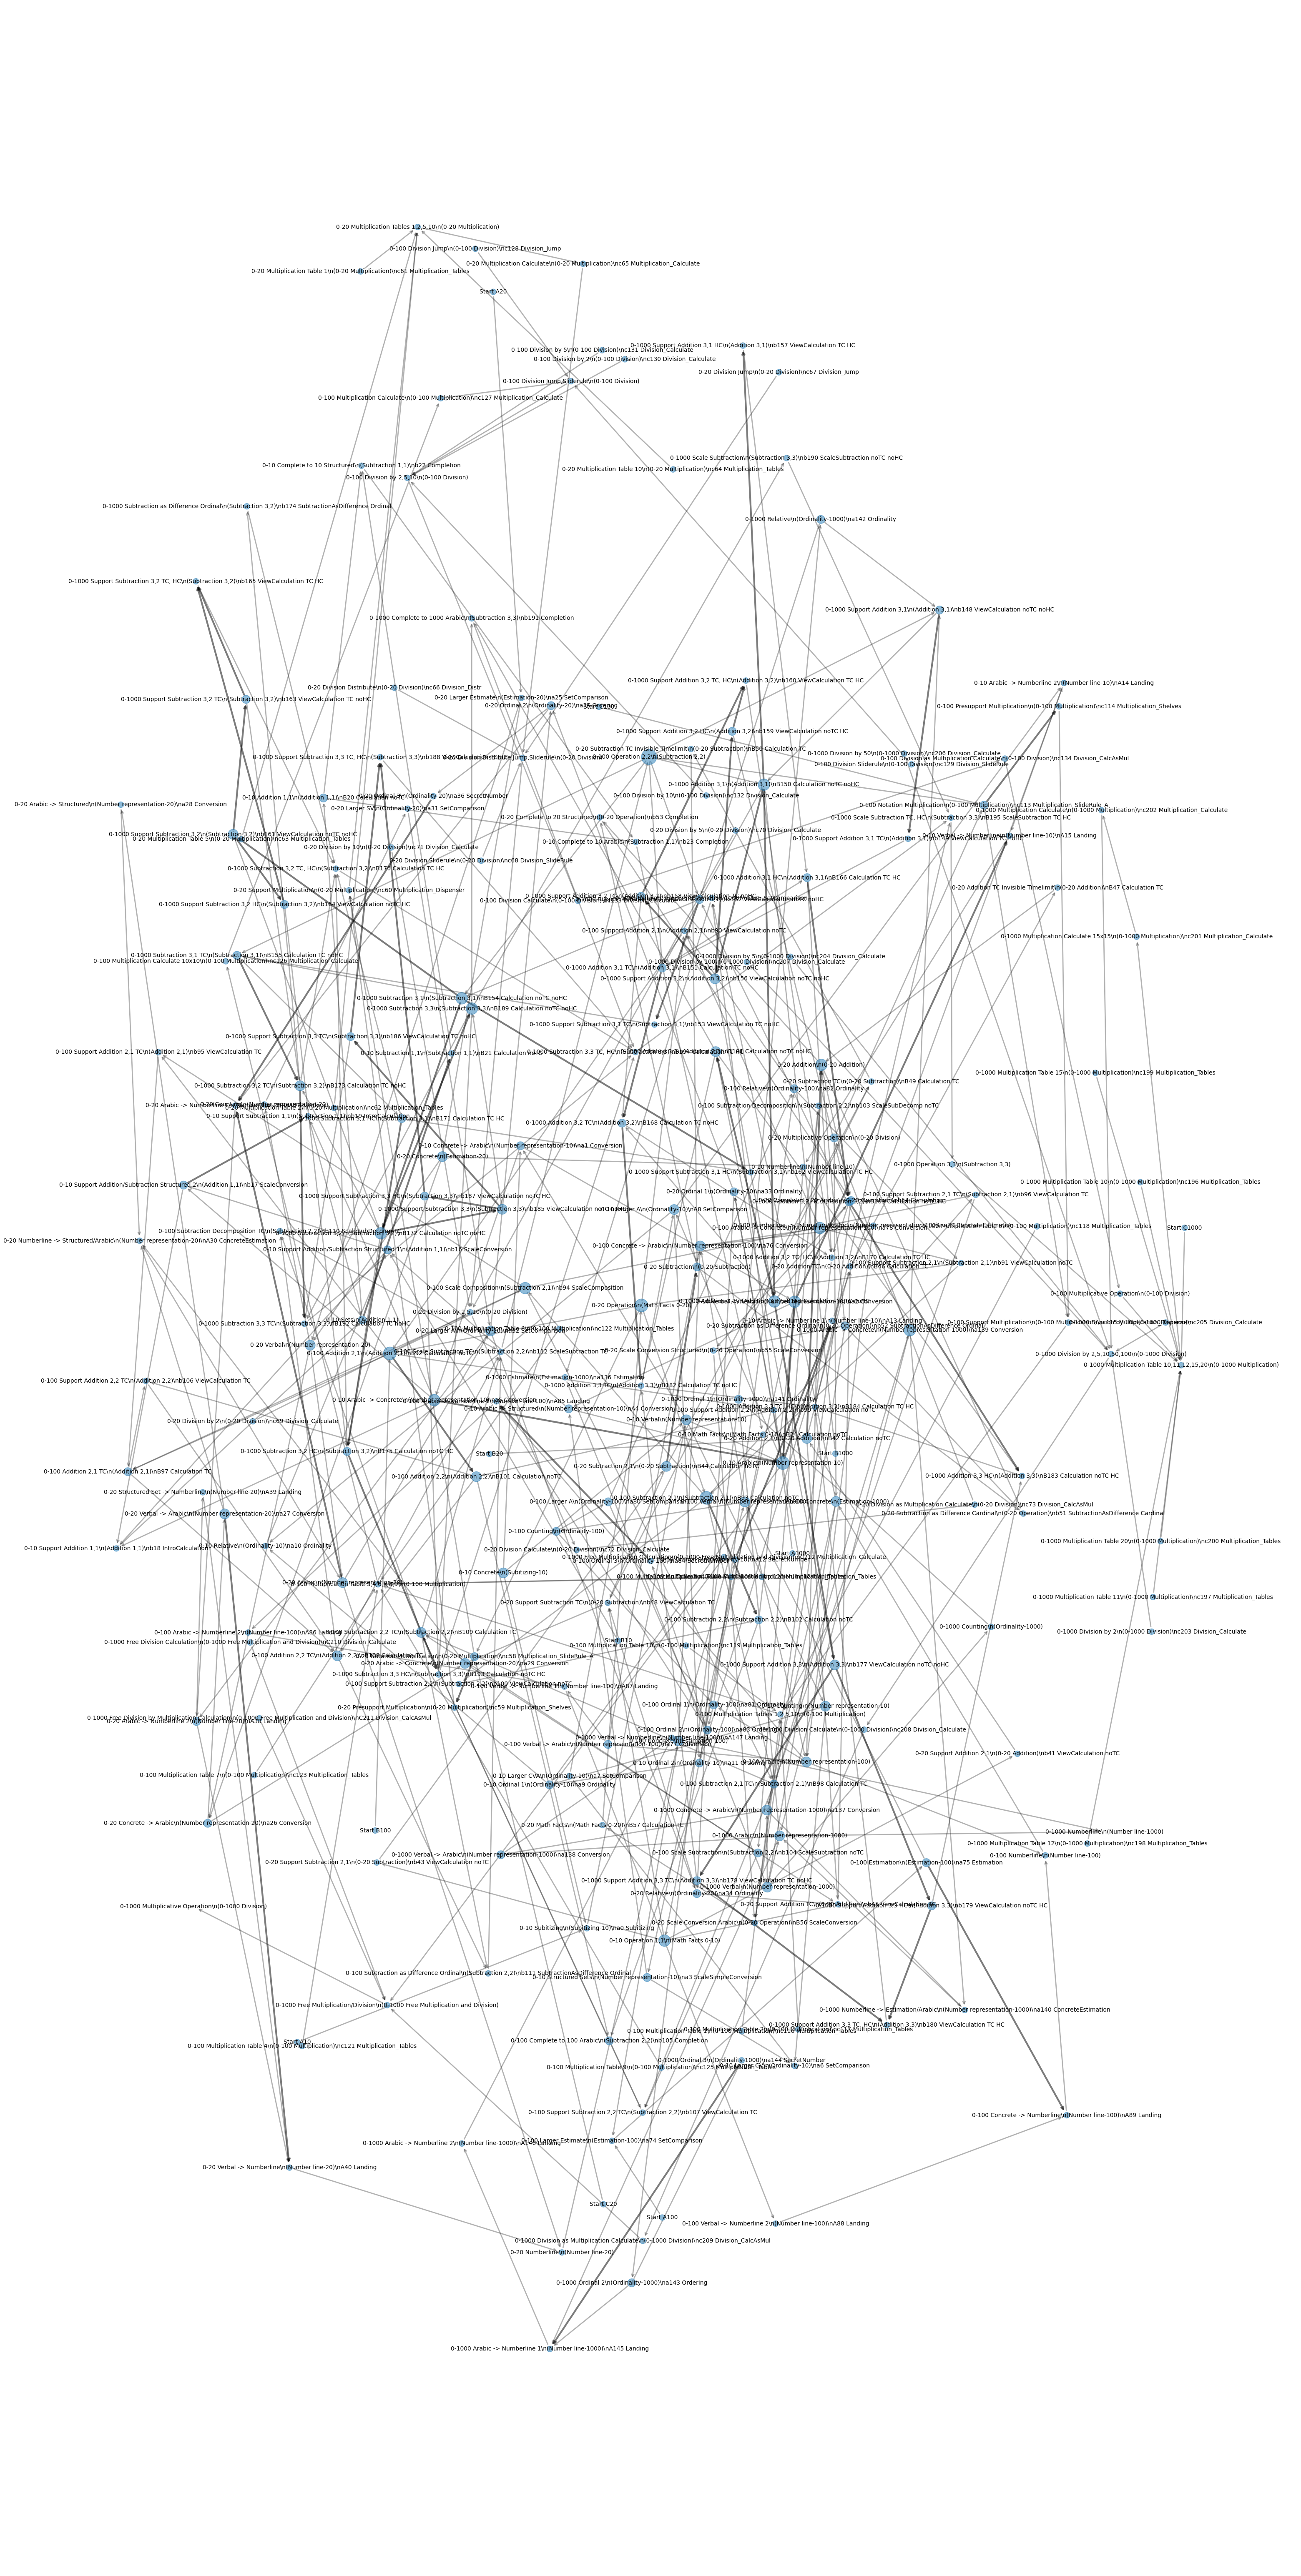

In [54]:
def draw_graph(G):
    plt.figure(figsize=(40, 80))
    pos = nx.spring_layout(G, k=0.3, iterations=50)
    node_sizes = [len(G.adj[node]) * 100 for node in G.nodes]
    edge_widths = [1 + len(G.get_edge_data(u, v)) for u, v in G.edges()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.5)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3, arrowsize=10, arrowstyle='->')
    labels = {node: node.replace('\n', ' ') for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
    plt.axis('off')
    plt.show()

draw_graph(G)

*Your discussion about your processing decisions goes here*

In [14]:
#Create graph as long as we dont have one
DG = nx.path_graph(5, create_using=nx.DiGraph)

#The data to check how the calculate_mastery_level function works
user_subtasks = subtasks.loc[subtasks['user_id'] == 1]
user_subtasks = user_subtasks.copy()
user_subtasks['subtask_finished_timestamp'] = pd.to_datetime(user_subtasks['subtask_finished_timestamp'])

user_subtasks = user_subtasks.dropna(subset=['subtask_finished_timestamp'])

start_date = user_subtasks['subtask_finished_timestamp'].min()

# Add the week number
user_subtasks['week_number'] = (((user_subtasks.subtask_finished_timestamp.view(np.int64) - pd.to_datetime([start_date]).view(np.int64)) / (1e9 * 60 * 60 * 24) - user_subtasks.subtask_finished_timestamp.dt.day_of_week + 7) // 7 + 1).astype(np.int64)

In [212]:
import re


def get_nodes(G, first_word, last_word):
    # Create the regular expression pattern
    pattern = r"\b" + first_word + r"\b(.*?)\b" + last_word + r"\b(.*)"

    nodes = list(G.nodes())

    matches = []
    # Search for matches
    for node in nodes:
        match = re.search(pattern, node)
        if match:
            matches.append(match.group())
    return matches

def get_skill_id_ranks(G, game):

    all_matches = get_nodes(G, '', game)

    skill_ranks = [s.split()[0] for s in all_matches]
    return set(skill_ranks)

def choose_ranking(G, game, skill_id):
    rankings = list(get_skill_id_ranks(G, game))

    upper_limits = np.array([int(rank.split("-")[1]) for rank in rankings])
    is_rank = skill_id < upper_limits

    if not is_rank.any():
        max_index = np.argmin(upper_limits)
    else:
        min_limit = np.min(upper_limits[is_rank])
        max_index = np.where(upper_limits == min_limit)[0][0]

    return rankings[max_index]
        

get_nodes(G, '', 'Landing')
get_skill_id_ranks(G, 'Landing')
print(choose_ranking(G, 'Landing', 98))

0-100


In [213]:
def calculate_mastery_level(G, user_subtasks, week, game, skill_id = 98):
    #Find the node id of the specified game
    node_id = 2 

    #Find the games of which the correctness should be calculated
    #games_graph = sorted(nx.ancestors(DG, 2) | {2})
    #games = ['Subitizing', 'Conversion', 'Landing']

    skill_rank = choose_ranking(G, game, skill_id)

    skill_node = get_nodes(G, skill_rank, game)[0]

    ancestors = nx.ancestors(G, skill_node)
    games = [ancestors]
    
    answers = []
    user_subtasks = user_subtasks[user_subtasks['week_number'] < week]
    for idx, subtask in user_subtasks.iterrows():
        answers.append(subtask['game_name'] in games and subtask['correct'])

    if not answers:
        return 0
    return sum(answers) / len(answers)

#calculate_mastery_level(G, user_subtasks, 10, 'Subitizing')

In [222]:
#events.loc[subtasks['event_id'] == 'a', ['game_name', 'skill_id']]

associated_events = events.loc[subtasks['event_id'], ['game_name', 'skill_id']]
associated_events = associated_events[associated_events['game_name'] == 'Landing']
print(associated_events)
print(associated_events['skill_id'].unique())

         game_name  skill_id
event_id                    
3          Landing      19.0
7          Landing      50.0
8          Landing      49.0
11         Landing      50.0
24         Landing      17.0
...            ...       ...
34078      Landing     111.0
34079      Landing     179.0
34080      Landing     181.0
34085      Landing      19.0
34086      Landing      51.0

[9648 rows x 2 columns]
[ 19.  50.  49.  17.  18. 109. 110.  51. 112. 180. 111. 179. 181.  48.
 108.   0.]


In [231]:
#create multindex
def create_dataframe_multi_index(G):
    multi_index = [[], [], []]
    df = pd.DataFrame(columns = ['mastery_level'], index = multi_index)
    df.index = df.index.set_names(['user_id', 'game_name', 'week'])

    for user_id, user in users.iterrows():
        #Get weeks
        user_subtasks = subtasks.loc[subtasks['user_id'] == user_id]
        user_subtasks = user_subtasks.copy()
        user_subtasks['subtask_finished_timestamp'] = pd.to_datetime(user_subtasks['subtask_finished_timestamp'])
        #user_subtasks.loc['subtask_finished_timestamp'] = user_subtasks.loc['subtask_finished_timestamp'].astype('datetime64[ns]')
        start_date = user_subtasks['subtask_finished_timestamp'].min()

        user_subtasks = user_subtasks.dropna(subset=['subtask_finished_timestamp'])
        # Add the week number
        user_subtasks['week_number'] = (((user_subtasks.subtask_finished_timestamp.view(np.int64) - pd.to_datetime([start_date]).view(np.int64)) / (1e9 * 60 * 60 * 24) - user_subtasks.subtask_finished_timestamp.dt.day_of_week + 7) // 7 + 1).astype(np.int64)
        
        #Get unique games names
        game_names = events.loc[subtasks['event_id']]['game_name'].unique()

        #Get unique skill_id of games
        #associated_events = events.loc[user_subtasks['event_id'], ['game_name', 'skill_id']]
        #associated_events = associated_events[associated_events['game_name'] == 'Landing']
        #print(associated_events)
        #print(associated_events['skill_id'].unique())
        #break

        #Create an part of index
        unique_weeks = user_subtasks['week_number'].unique()
        len_weeks = len(unique_weeks)
        len_game_names = len(game_names)

        user_ids = [user_id for i in range(len_weeks * len_game_names)]

        weeks = user_subtasks['week_number'].unique()
        weeks = np.concatenate([weeks]* (len_game_names))

        user_unique_games = [game for game in game_names for week in range(len_weeks)]

        tuples = list(zip(user_ids, user_unique_games, weeks))

        index = pd.MultiIndex.from_tuples(tuples, names=['user_id', 'game_name', 'week'])

        df1 = pd.DataFrame(columns = ['mastery_level'], index = index)

        #mastery_level = np.array([1 for i in range(len_weeks * len_game_names)])
        mastery_level = []

        for game in game_names:
            for week in unique_weeks:
                associated_events = events.loc[user_subtasks['event_id'], ['game_name', 'skill_id']]
                #print(associated_events)
                #print(user_subtasks['week_number'])
                #associated_events['week'] = events.loc[user_subtasks['week_number']]
                #associated_events = associated_events[associated_events['game_name'] == game and associated_events['week_number'] == week]
                #print(associated_events)
                #print(associated_events['skill_id'].unique())
                break
                #Calculate the skill id in the certain game after a certain number of weeks
                lv = calculate_mastery_level(G, user_subtasks, week, game)
                mastery_level.append(lv)
            break
        break
        mastery_level = pd.DataFrame(mastery_level, columns = ['mastery_level'])
        mastery_level.index = index
        df1['mastery_level'] = mastery_level
        df = pd.concat([df, df1], axis=0)
        if user_id > 100:
            break
    return df

df = create_dataframe_multi_index(G)

                          game_name  skill_id
event_id                                     
0                        Subitizing       1.0
0                        Subitizing       1.0
1                        Conversion       4.0
2                        Conversion       7.0
3                           Landing      19.0
4                        Conversion       7.0
5                        Conversion       4.0
6                        Comparison      33.0
6                        Comparison      33.0
7                           Landing      50.0
8                           Landing      49.0
9         Estimation on Number Line      39.0
10                         Distance      45.0
11                          Landing      50.0
subtask_id
0      1
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      7
9     12
10    13
11    14
12    15
13    15
Name: week_number, dtype: int64


ValueError: Cannot set a DataFrame with multiple columns to the single column week

In [20]:
df.loc[[45]]
#df.loc[(457, 'Subitizing'), :]
random_user_ids = random.sample(range(len(users)), 10)
#sers.iloc[random_user_ids]

KeyError: (589, 'Subitizing')

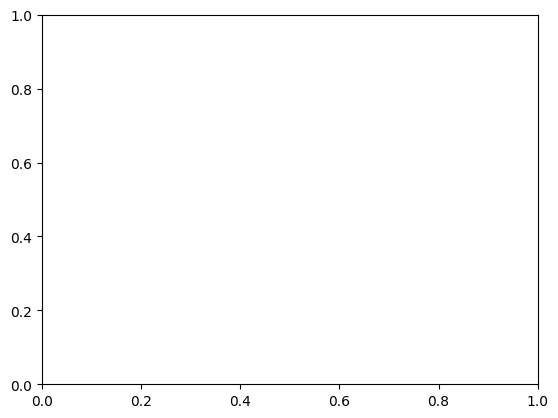

In [21]:
#Create visualization
def show_mastery_lvl(df, users, game):
    fig, ax = plt.subplots()
    for user in users:
        temp_df = df.loc[(user + 1, 'Subitizing'), :]
        temp_df.plot(y='mastery_level', kind='line', title=f'Mastery of {game} Over Time', ax=ax)
        plt.xlabel('weeks')
        plt.ylabel('mastery_level')
    plt.show()

show_mastery_lvl(df, random_user_ids, 'Subitizing')

## Task 2: Model Building

Train a model for your research question. 

In [ ]:
# Your code for training a model goes here

*Your discussion about your model training goes here*

## Task 3: Model Evaluation
In this task, you will use metrics to evaluate your model.

In [ ]:
# Your code for model evaluation goes here

*Your discussion/interpretation about your model's behavior goes here*

## Task 4: Team Reflection
Please describe the contributions of each team member to Milestone 4. Reflect on how you worked as team: what went well, what can be improved for the next milestone?

*Your discussion about team responsibilities goes here*